In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

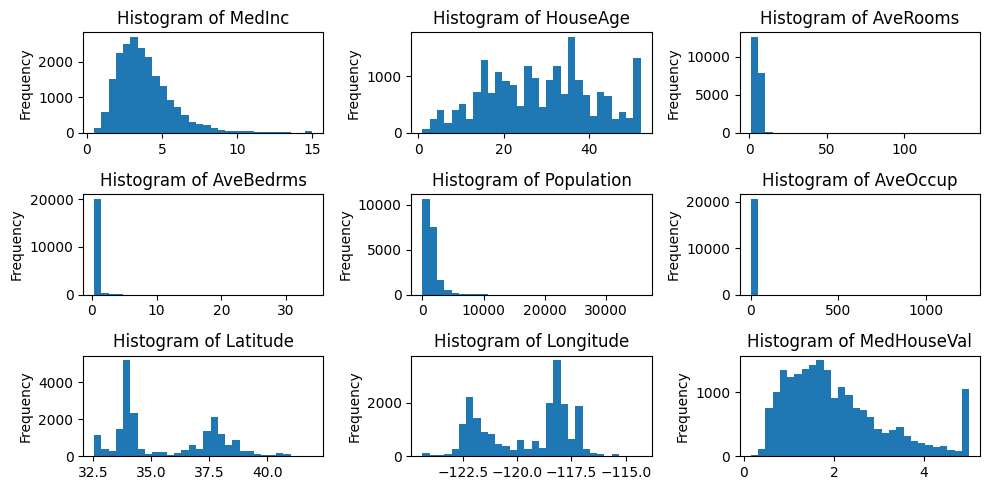

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 5))
for i, column in enumerate(df.columns):
    df[column].plot(kind='hist', ax=axes[i // 3, i % 3], title=f'Histogram of {column}', bins=30)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

df['AveRooms'] = StandardScaler().fit_transform(df['AveRooms'].values.reshape(-1, 1))
df['AveBedrms'] = StandardScaler().fit_transform(df['AveBedrms'].values.reshape(-1, 1))
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  0.628559  -0.153758       322.0  2.555556     37.88   
1      8.3014      21.0  0.327041  -0.263336      2401.0  2.109842     37.86   
2      7.2574      52.0  1.155620  -0.049016       496.0  2.802260     37.85   
3      5.6431      52.0  0.156966  -0.049833       558.0  2.547945     37.85   
4      3.8462      52.0  0.344711  -0.032906       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0 -0.155023   0.077354       845.0  2.560606     39.48   
20636  2.5568      18.0  0.276881   0.462365       356.0  3.122807     39.49   
20637  1.7000      17.0 -0.090318   0.049414      1007.0  2.325635     39.43   
20638  1.8672      18.0 -0.040211   0.158778       741.0  2.123209     39.43   
20639  2.3886      16.0 -0.070443   0.138403      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [18]:
from sklearn.model_selection import train_test_split

y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5757877060324511

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.6162934890919368

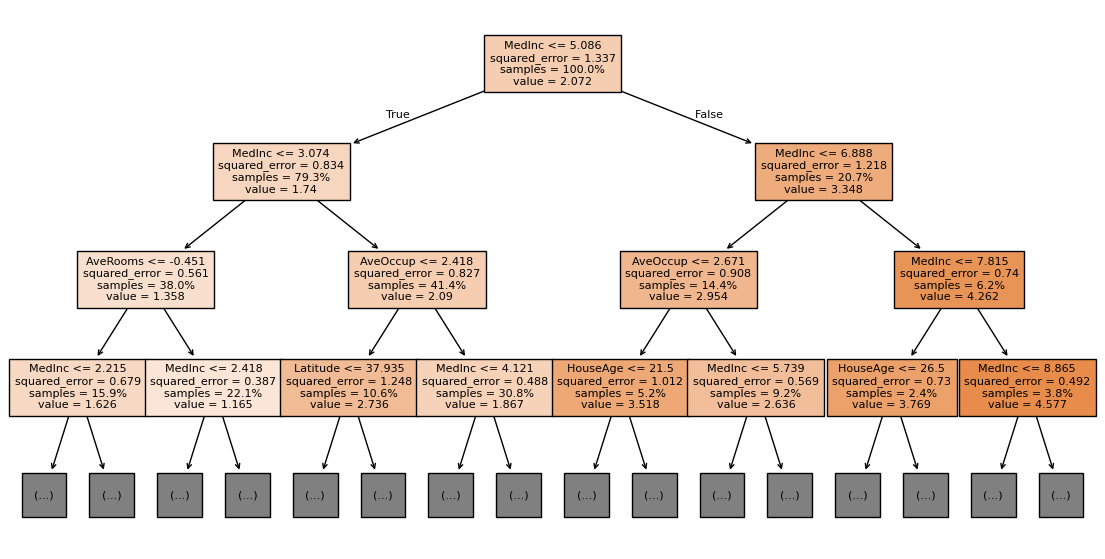

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 7))
plot_tree(dtr, filled=True, feature_names=X_test.columns, max_depth=3, proportion=True, fontsize=8)
plt.show()

In [22]:
import dtreeviz

viz_rmodel = dtreeviz.model(dtr, X_test, y_test, target_name='MedHouseVal', feature_names=X_test.columns)

viz_rmodel.view(depth_range_to_display=(1, 5), orientation='LR', scale=1.5)


x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide


In [26]:
import random
from pprint import pprint

best_choice = {}

for cnt in range(1, 600):
    dtr = DecisionTreeRegressor(max_depth=random.randint(1, 20),
                                min_samples_leaf=random.randint(1, 30),
                                max_features=random.randint(1, 8),
                                random_state=10)
    dtr.fit(X_train, y_train)
    res_scores = dtr.score(X_test, y_test)
    ini_scores = dtr.score(X_train, y_train)
    if res_scores > best_choice.get('score', 0):
        print(f"Best Score: {res_scores:.6} | Initial Score: {ini_scores:.6}")
        best_choice['score'] = res_scores
        best_choice['model'] = dtr
print()
pprint(best_choice)


Best Score: 0.711665 | Initial Score: 0.803304
Best Score: 0.725917 | Initial Score: 0.842826
Best Score: 0.730174 | Initial Score: 0.824092
Best Score: 0.734692 | Initial Score: 0.809956
Best Score: 0.75079 | Initial Score: 0.828636

{'model': DecisionTreeRegressor(max_depth=12, max_features=7, min_samples_leaf=16,
                      random_state=10),
 'score': 0.7507900290145532}


In [29]:
dtr = DecisionTreeRegressor(max_depth=12, max_features=7, min_samples_leaf=16, random_state=10)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.7507900290145532

In [27]:
best_choice['model'].feature_importances_

array([0.5953134 , 0.03863889, 0.01037686, 0.0078408 , 0.00676842,
       0.13989744, 0.10649092, 0.09467327])

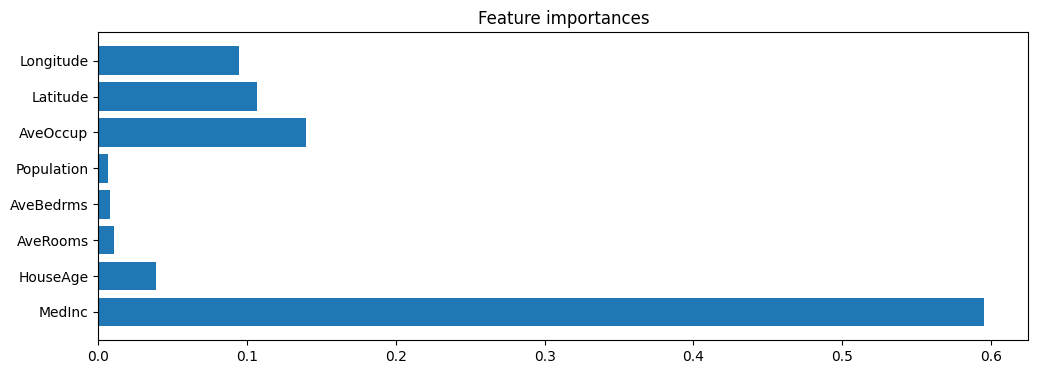

In [28]:
plt.figure(figsize=(12, 4))
plt.barh(y=np.arange(len(best_choice['model'].feature_importances_)), width=best_choice['model'].feature_importances_)
plt.yticks(np.arange(len(X_test.columns)), X_test.columns)
plt.title('Feature importances')
plt.show()

### Сравнение точности двух моделей

- Модель линейной регрессии (`LinearRegression`) показала точность примерно 0.576, что указывает на то, как модель справляется с предсказанием значения `MedHouseVal` на основе тестового набора данных.
- Модель дерева решений (`DecisionTreeRegressor`), обученная без явного указания гиперпараметров, показала точность около 0.618. Это указывает на лучшую способность модели предсказывать значение `MedHouseVal` по сравнению с линейной регрессией.

### Выводы по использованию моделей

#### Линейная регрессия:
- **Плюсы**: Простота интерпретации, небольшое количество параметров для настройки, хорошо работает на линейно зависимых данных.
- **Минусы**: Ограниченность в моделировании только линейных отношений, может плохо справляться с данными, где присутствуют нелинейные зависимости между признаками и целевой переменной.

#### Дерево решений:
- **Плюсы**: Способность моделировать нелинейные зависимости, легкость интерпретации результатов (особенно с помощью визуализации деревьев), гибкость в настройке параметров.
- **Минусы**: Склонность к переобучению, особенно при большой глубине дерева или отсутствии достаточного количества данных для обучения. Необходимость в тщательной настройке гиперпараметров для достижения оптимальной производительности.

### Рекомендации по использованию

- **Линейная регрессия** предпочтительнее для задач, где предполагается линейная зависимость между признаками и целевой переменной, и важна простота интерпретации результата.
- **Дерево решений** лучше подходит для сложных задач, где между признаками и целевой переменной существуют нелинейные зависимости. Деревья решений также предпочтительны, когда требуется глубокий анализ важности признаков и их влияния на целевую переменную. 

Важно учитывать, что при использовании деревьев решений следует быть осторожным с гиперпараметрами для предотвращения переобучения, и может потребоваться использование методов, таких как обрезка дерева или ансамблевые методы (например, случайный лес), для улучшения обобщающей способности модели.